# Анализ товарного ассортимента интернет-магазина товаров для дома и быта 

**Материалы**:                  
  
Дашборд:  https://public.tableau.com/app/profile/kate.zavadskaya/viz/diplom_16923926018140/Dashboard1?publish=yes

В нашем распоряжении есть информация транзакций интернет-магазина товаров для дома и быта «Пока все ещё тут» за несколько лет. Нам необходимо проанализировать товарный ассортимент магазина и разделить его на основной и дополнительный, а также подготовить  рекомендации для отдела закупок относительно выбора ассортимента на основании полученных данных.

У нас есть данные о дате заказа, идентификаторе покупателя, идентификаторе заказа, наименовании заказанного товара, его количестве в заказе и цене.

**Цель исследования:**      
1. Проанализировать текущий ассортимент магазина и выявить особобенности
2. Выделить товарные категории, определить основной и дополнительный ассортимент
3. Выявить топ-10 лучших и худших товаров интернет-магазина
4. Анализ кол-ва заказов товара в динамике
5. Рекомендации по выбору ассортимента

## Обзор данных и знакомство с ними 

In [1]:
# импортируем библиотеки
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import scipy.stats as stats
from plotly import graph_objects as go

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [2]:
#настраиваем отображение документа
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.float_format", "{:.2f}".format)
# устанавливаем стиль графиков
sns.set_style('whitegrid')
sns.set_context('notebook')  
sns.set_palette('muted') 
sns.set(rc={'figure.figsize':(15,8)})


In [3]:
#открываем файл
ecom = pd.read_csv('/datasets/ecommerce_dataset.csv')

ecom.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.00
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.00
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.00
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.00
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.00


In [4]:
# смотрим типы данных                 
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


В нашем датасете 6737 записей, 6 колонок. В нем отсутсвуют пропуски, т.к. кол-во значений в колонках совпадает. Нам необходимо:
- первести дату в дату и время и перевести в datetime    
- посмотреть столбец с наименованиями, проверить дубли на явные и неявные    
- в столбце с ценой все значения целочисленные, поэтому можно перевести столбец в тип данных int. 

В остальном значения соответствуют типу данных и, вцелом, других проблем в данных, на первый взгляд, нет.

## Предобработка данных 

### Перевод в нижний регистр и к одному языку 

In [5]:
# посмотрим на столбец с названием и внесем коррективы
ecom['product'].tolist()

['Комнатное растение в горшке Алое Вера, d12, h30',
 'Комнатное растение в горшке Кофе Арабика, d12, h25',
 'Радермахера d-12 см h-20 см',
 'Хризолидокарпус Лутесценс d-9 см',
 'Циперус Зумула d-12 см h-25 см',
 'Шеффлера Лузеана d-9 см',
 'Юкка нитчатая d-12 см h-25-35 см',
 'Настенная сушилка для белья Gimi Brio Super 100',
 'Таз пластмассовый 21,0 л круглый "Водолей" С614, 1404056',
 'Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379',
 'Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331',
 'Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м',
 'Чехол Eurogold Clean Basic хлопок для досок 120х38-120х42 см C42',
 'Крючок одежный 2-х рожковый серый металлик с полимерным покрытием *Тонар*, 1110027',
 'Корзина мягкая пластиковая 17 л, М-пластика, M2880',
 'Мини-сковорода Marmiton "Сердце" с антипригарным покрытием 12 см, LG17085',
 'Сковорода алюминиевая с антипригарным покрытием MARBLE ALPENKOK d = 26 см AK-003

Просмотрев значения, есть понимание, что нужно исправить: привести к нижнему регистру, поменять ё/е, убрать лишние запяты, переименовать одно значение, которое начинается с англ буквы, остальные названия на англ переводить не будем, т.к. нас интересуют только первые 2 слова, по которым будем выделять товарные категории.

In [6]:
ecom['product'] = ecom['product'].str.lower()
ecom['product'] = ecom['product'].str.replace('ё', 'е')
ecom['product'] = ecom['product'].str.replace(',', '')
ecom['product'] = ecom['product'].str.replace('tepмокружка', 'тepмокружка')

### Изменение типов данных

In [7]:
ecom['date'] = pd.to_datetime(ecom['date'], format = '%Y%m%d%H')
ecom['price'] = ecom['price'].astype('int')
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 315.9+ KB


### Устранение дубликатов 

In [8]:
# проверяем наличие явных дубликатов
ecom.duplicated().sum()

0

Явных дубликатов нет, теперь проверим неявные. Нас также интересует проверка на уникальность заказов(1 номер заказа - 1 клиент), а также 1 заказ-1 дата заказа.

In [9]:
# проверим совпадения по ид клиента, номера заказа и товару
ecom[ecom.duplicated(subset=['customer_id', 'order_id', 'product'])]

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,эвкалипт гунни d-17 см h-60 см,1,1409
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,мирт d-9 см h-15 см,1,134
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,таз пластмассовый со стиральной доской (иж) 1404021,1,397
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,таз пластмассовый со стиральной доской (иж) 1404021,1,397


Такие дубликаты есть и таких строк очень много, 1886 строк, это почти 30%. У строк отличается только дата, остальное всё совпадает. В любом случае они являются дублями и, если их оставить, то они сильно исказят итоговые результаты. 

In [10]:
#перезаписывает датасет и удаляем дубликаты
ecom = ecom.drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='last', ignore_index=False)

In [11]:
# проверяем уникальность заказа по принципу 1 заказ - 1 клиент
duplicates = ecom.groupby('order_id').agg({'customer_id':'nunique'}).query('customer_id>1').reset_index()
print(duplicates.count())


order_id       29
customer_id    29
dtype: int64


Такие заказы, по которым больше 1 клиента по 1 номеру заказа, что вцелом невозможно, присутсвуют в датасете. Нам нужно добиться уникальности заказов для дальнейшего исследования, поэтому удалим такие заказы, тем более их немного.

In [12]:
# номера заказов-дублей сохраним в отдельную переменную и удалим их из датасета
doubles = duplicates['order_id']
ecom = ecom.query('order_id not in @doubles')

In [13]:
# проверим уникальность 1 дата - 1 заказ
print(ecom.groupby('order_id').agg({'date':'nunique'}).query('date>1').count())
dubl = ecom.groupby('order_id').agg({'date':'nunique'}).query('date>1')


date    15
dtype: int64


In [14]:
# проверим один такой заказ
ecom.query('order_id==68760')

,date,customer_id,order_id,product,quantity,price
416,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,вешалка деревянная с расширенными плечиками и перекладиной 445х23 см см серый japanese black valiant jb-19708,8,262
418,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,вешалка с закругленными плечиками без перекладины с противоскользящим покрытием valiant 226b10 черный,7,106
423,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,короб стеллажный с крышкой большой 30*40*25 см expedition valiant ex-box-lm,1,674
424,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,короб стеллажный с крышкой малый 28*30*16 см expedition valiant ex-box-ls,3,524
427,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,набор вешалок мягких тканевых с перекладиной 38х15 см 2 шт валиант / valiant val 7054sb,2,277
435,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,швабра сальса треугольная мини y8110,1,524
463,2018-10-27 23:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,гладильная доска sarayli tamara 125x42 см,1,3074
515,2018-10-29 17:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,вешалка для блузок 41 см черный attribute ahm791,9,50
516,2018-10-29 17:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,коврик влаговпитывающий ребристый 50х80 см стандарт черный 5877,1,299
517,2018-10-29 17:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,коврик влаговпитывающий ребристый 60х90 см стандарт зеленый 5884,1,412


Интересно, что заказ датируется разными днями и у этих заказов разные товары. Можно предположить, что на сайте реализована функция добавления товаров в заказ после оформления. Таких заказов немного, они не исказят данные в любом случае, поэтому просто оставим эти заказы с разными датами.

### Устранение аномалий 

Аномалии возможны в данных в колонках с ценой и количеством товаров в заказе.
Проверим каждый столбец отдельно.

In [15]:
# проверим распределение по ценам
ecom['price'].describe()

count    4785.00
mean      516.23
std       948.12
min         9.00
25%        90.00
50%       150.00
75%       488.00
max     14917.00
Name: price, dtype: float64

Разброс мощный, от 10 до 14917 руб. Посмотрим, что это за товары с самой высокой и самой низкой ценой

In [16]:
ecom.sort_values(by='price',ascending=False)

,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,14917
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,сумка-тележка хозяйственная andersen royal shopper hera синяя 166-004-90,1,8737
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,сумка-тележка хозяйственная andersen alu star shopper hava синяя 115-103-90,1,8437
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,сумка-тележка хозяйственная rolser mnb019 rojo logic dos+2 красная,1,8077
6629,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,стремянка 7 ступенчатая hailo 8040-707 xxl 13 см алюминиевая с лотком для инструментов,1,7724
...,...,...,...,...,...,...
6378,2019-09-21 21:00:00,6718a7fc-75c2-4b8a-820d-b2960be23ca7,14932,петрушка итальянский гигант 2 г 4660010776553,1,10
1069,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,алиссум (лобулярия) снежные одежды 02 г 4650091480302,2,9
5642,2019-07-03 22:00:00,1ec1ad59-a29b-4949-929d-f4fc4fe14758,14887,алиссум (лобулярия) снежные одежды 02 г 4650091480302,1,9
2159,2019-03-04 15:00:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,горох амброзия 100 г 4660010772616,1,9


Такие цены, на первый взгляд, кажутся неправдоподобными. Но google решает эту проблему. Сушилка уличная, данные сумки-тележки из топа имеют рыночную цену и действительно столько стоят, значит это не выбросы. Товары с самой низкой ценой - 10 руб - это семена, которые фактически и имеют такую стоимость и на др площадках. Значит с ценами проблем нет и все корректно.

In [17]:
# проверяем данные по колонке с кол-ом товаров
ecom['quantity'].describe()

count   4785.00
mean       2.81
std       17.72
min        1.00
25%        1.00
50%        1.00
75%        1.00
max     1000.00
Name: quantity, dtype: float64

Разброс тоже большой, но здесь явно есть выброс, т.к 75% данных с кол-вом 1 шт в заказе, а максимальное количество равно 1000. Смотрим более детально.

In [18]:
ecom.sort_values(by='quantity',ascending=False).head(20)

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,вантуз с деревянной ручкой d14 см красный burstenmann 0522/0000,1000,675
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,ручка-скоба рс-100 белая *трибатрон* 1108035,200,29
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) без крепления 1107014,150,38
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,крепеж для пружины дверной 1107055,150,19
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,щетка для посуды *оля* мультипласт 1807010,100,26


Первая строка точно заставляет усомниться в корректности данных, 1000 вантузов в заказе скорее похожи на выброс. Но есть и другие значения, которые выглядят сомнительно, например, 100 шт щёток для мытья посуды и многие другие. Посмотрим 95 и 99 перцентили и построим диаграмму разброса.

In [19]:
np.percentile(ecom['quantity'], [95, 99])

array([ 7., 30.])

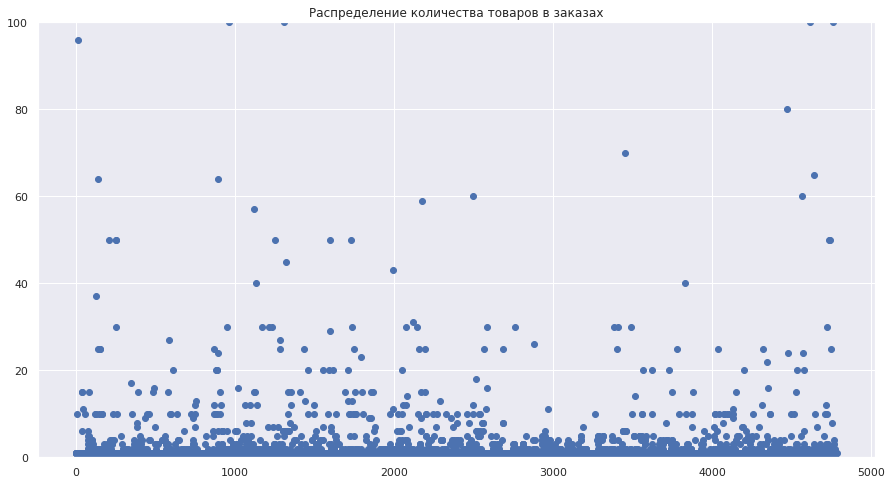

In [20]:
plt.ylim(0, 100)
x = pd.Series(range(0,len(ecom['quantity'])))
plt.scatter(x, ecom['quantity'])
plt.title('Распределение количества товаров в заказах')

plt.show()

99 перцентиль показывает значение 30 шт. Выглядит по диаграмме слишком низким значением, т.к. выше этого значения достаточно много данных. Выберем золотую середину - за крайнее значение возьмем 40 ед товаров в заказе.


In [21]:
# обновляем датасет и чистим от выбросов
ecom = ecom.query('quantity < 40')

### Добавление новых столбцов 

In [22]:
# добавляем столбцы с часом заказа, месяцем и днем недели, выручкой, годом
ecom['hour'] = ecom['date'].dt.hour
ecom['month'] = ecom['date'].dt.month_name()
ecom['weekday'] = ecom['date'].dt.day_name()
ecom['total'] = ecom['price']*ecom['quantity']
ecom['year_month'] = ecom['date'].dt.strftime('%Y-%m')

ecom.head(10)

,date,customer_id,order_id,product,quantity,price,hour,month,weekday,total,year_month
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке алое вера d12 h30,1,142,0,October,Monday,142,2018-10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке кофе арабика d12 h25,1,194,0,October,Monday,194,2018-10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,0,October,Monday,112,2018-10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,0,October,Monday,179,2018-10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,0,October,Monday,112,2018-10
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164,0,October,Monday,164,2018-10
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134,0,October,Monday,134,2018-10
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824,8,October,Monday,824,2018-10
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 210 л круглый ""водолей"" с614 1404056",1,269,8,October,Monday,269,2018-10
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379,1,674,9,October,Monday,674,2018-10


### Выделение товарных категорий 

Немного упростим задачу и создадим отдельный столбец, где будут 2 первых слова из наименования и далее создадим словари с названием категорий вручную.

In [23]:
# создадим функцию для выделения 2х первых слов из наименования
def two_words(row):
    word = row['product'].split()
    two_words = word[0] + ' ' + word[1]
    return two_words

In [24]:
ecom['two_words'] = ecom.apply(two_words, axis=1)

In [25]:
ecom.head()


,date,customer_id,order_id,product,quantity,price,hour,month,weekday,total,year_month,two_words
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке алое вера d12 h30,1,142,0,October,Monday,142,2018-10,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке кофе арабика d12 h25,1,194,0,October,Monday,194,2018-10,комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,0,October,Monday,112,2018-10,радермахера d-12
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,0,October,Monday,179,2018-10,хризолидокарпус лутесценс
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,0,October,Monday,112,2018-10,циперус зумула


In [26]:
# создаем словарь с категориями
category = {
    'Дача и сад': ['рассада', 'муляж','пеларгония', 'подсолнечник', 'калатея', 'кориандр', 'корыто', 'шнур', 'урна', 'артемизия', 'каллуна гарден', 'бархатцы', 'космея', 'морковь', 'настурция', 'огурец', 'петуния', 'шило', 'гвоздика', 'годеция', 'календула', 'капуста', 'кореопсис', 'лапчатка', 'зев', 'флокс', 'цинерария', 'эшшольция', 'эвкалипт', 'литопс', 'лавр', 'мединилла', 'тимьян', 'гиностемма', 'фуксия', 'укроп', 'томат', 'салат','петрушка', 'базилик','кодонанта','колокольчик', 'бидон', 'петуния', 'вербена', 'крокусы', 'однолетнее', 'земляника', 'горох', 'седум', 'незабудка', 'тыква', 'кабачок', 'тюльпан', 'шалфей', 'табак', 'любисток', 'змееголовник', 'валериана', 'ранункулус', 'ромашка', 'лен', 'камнеломка', 'анемона', 'смолевка', 'георгина', 'овсянница', 'лаватера', 'лист', 'вербейник', 'цинния', 'виола', 'ясколка', 'эхинацея', 'котовник', 'лобелия', 'тагетис', 'патиссон', 'дыня', 'виноград', 'вероника', 'целозия', 'маттиола', 'арбуз', 'клубника','лук', 'хоста', 'гайлардия', 'осина',  'клен', 'новогоднее', 'ель', 'сциндапсус', 'травы', 'астра'], 
    'Посуда и кухонные принадлежности': ['тарелка','вилка','ложка','ложка','нож', 'кружек','фужеров', 'кувшин', 'скатерть', 'толкушка', 'чайник', 'банка', 'противень', 'крышка', 'салфетка', 'вкладыши', 'миксер', 'тepмокружка', 'мини-сковорода', 'сковорода', 'ножеточка', 'масленка', 'салатник', 'чайный', 'эмалированных', 'рыбочистка', 'овощеварка', 'терка', 'кружка', 'лопатка', 'салфетница', 'стакан', 'овощечистка', 'измельчитель', 'кухонных', 'мантоварка', 'бокалов', 'стаканов', 'картофелемялка', 'ковш', 'ножницы', 'кисточка', 'скребок', 'рассекатель пламени', 'форм', 'миска', 'пресс', 'сахарница', 'экран', 'половник', 'столовых', 'блюдо', 'электроштопор', 'термос', 'бульонница', 'соковыжималка', 'кастрюля', 'стеклянная','емкость', 'соковарка','хлебница','блюдце', 'орехоколка', 'шприц', 'скалка', 'сито', 'венчик', 'тортница', 'сотейник', 'посуды'], 
    'Цветы, растения, горшки': ['комнатное', 'радермахера', 'хризолидокарпус','циперус','шеффлера','юкка', 'многолетнее', 'суккулент','эхеверия', 'герань', 'цветок', 'адиантум', 'кампанула', 'композиция', 'нолина', 'хлорофитум', 'цикламен', 'глоксиния', 'азалия', 'гортензия', 'хризантема', 'мирт', 'иссоп', 'сантолина', 'аспарагус', 'афеляндра', 'антуриум', 'молодило', 'фиалка', 'гербера', 'душица обыкновенная', 'мелисса лекарственная', 'роза', 'бегония', 'розмарин', 'соланум', 'хлорофитум', 'альбука', 'бальзамин', 'бегония', 'крассула', 'лаванда', 'мята', 'каланхое', 'примула', 'калоцефалус','дендробиум', 'капсикум', 'мимоза', 'алиссум', 'диффенбахия', 'фаленопсис', 'пуансетия',  'кипарисовик', 'зверобой', 'эхинокактус', 'пахира' , 'аптения', 'пуансеттия', 'чабер', 'скиммия', 'алоэ','фиттония', 'кофе','фикус','амариллис', 'лиана', 'гимнокалициум','декабрист', 'замиокулькас','спатифиллум', 'импатиенс', 'подарочный', 'гипсофила', 'аквилегия','эпипремнум', 'лантана', 'гардения', 'хамедорея', 'калла', 'нефролепис', 'гиацинт', 'монарда', 'калибрахоа', 'буддлея', 'кашпо', 'фатсия', 'энотера', 'платикодон', 'папоротник', 'лилейник', 'барвинок', 'пеперомия', 'цитрофортунелла', 'мускари', 'пиретрум', 'муррайя', 'джункус', 'драцена', 'рудбекия', 'бузульник', 'солидаго', 'физостегия'],
    'Хозяйственные товары': ['сушилка', 'таз', 'чехол', 'чехол', 'сумка-тележка', 'щетка-сметка','сумка', 'ерш', 'котел', 'доска','прищепок', 'гладильная', 'подкладка','дозатор', 'мусорный', 'перчатки', 'стремянка', 'лестница-стремянка', 'тележка', 'комплект', 'биопорошок', 'крем', 'щетка', 'стремянки','светильник', 'щетка-утюжок', 'мыло', 'пена','подрукавник', 'паста', 'веник', 'лестница-стремянка', 'швабра', 'подголовник', 'ведро', 'подкладка', 'насадка', 'утюг', 'сиденье', 'сметка', 'линейка', 'средство', 'бензин', 'держатель', 'пробка', 'губка', 'фен',  'антижир', 'термометр', 'бальзам', 'ополаскиватель', 'сетка', 'весы', 'подставка', 'рукав', 'покрытие', 'стяжки', 'кипятильник', 'мыльница', 'совок','тряпка', 'штанга', 'вантуз', 'кольца', 'кондиционер', 'ключница', 'концентрированный','соль','пьезозажигалка','мешок', 'салфетки', 'пылесос', 'веревка', 'маска', 'фал', 'шпагат', 'окномойка', 'прищепки', 'концентрат', 'ванна', 'антинакипин', 'отжим', 'vileda'],
    'Текстиль': ['штора', 'плед', 'коврик','ковер', 'простыня', 'ковров', 'плечики', 'подушка', 'полотенце', 'карниз', 'наматрасник', 'наматрицник-чехол', 'халат', 'полотенце', 'покрывало', 'постельного', 'одеяло', 'ткань', 'махровых', 'наматрацник', 'наволочка', 'пододеяльник'],
    'Хранение вещей': ['вешалка', 'корзина',  'вешалок', 'крючок', 'кофр', 'контейнер', 'ящик' , 'короб ', 'вешалок', 'вешалка-плечики', 'коробка', 'плечики', 'вешалка-стойка', 'лоток', 'вешалки', 'ролик', 'блок', 'вешалка-сушилка', 'полки', 'стеллаж', 'этажерка', 'фоторамка', 'пакет', 'картонная', 'полка', 'комод', 'корзинка', 'бак', 'складной', 'обувница'],
    'Ремонт': ['стяжка', 'петля', 'сверел', 'сверло-фреза', 'сварка', 'измерительный', 'петля-стрела','основание', 'инструмент', 'уголок', 'решетка', 'завертка', 'крепеж', 'прецизионных', 'штангенциркуль', 'сверло', 'фиксатор-шар']
}

In [27]:
# функция для выделения категории по словарю
def categorization(name):
    for key, value in category.items():
        for word in value:
            if name.find(word) > -1:
                return key
    return 'Нет категории'

In [28]:
# запускаем функцию
ecom['category'] = ecom['two_words'].apply(categorization)
# проверяем присвоение категорий
ecom.head(10)

,date,customer_id,order_id,product,quantity,price,hour,month,weekday,total,year_month,two_words,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке алое вера d12 h30,1,142,0,October,Monday,142,2018-10,комнатное растение,"Цветы, растения, горшки"
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке кофе арабика d12 h25,1,194,0,October,Monday,194,2018-10,комнатное растение,"Цветы, растения, горшки"
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,0,October,Monday,112,2018-10,радермахера d-12,"Цветы, растения, горшки"
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,0,October,Monday,179,2018-10,хризолидокарпус лутесценс,"Цветы, растения, горшки"
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,0,October,Monday,112,2018-10,циперус зумула,"Цветы, растения, горшки"
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164,0,October,Monday,164,2018-10,шеффлера лузеана,"Цветы, растения, горшки"
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134,0,October,Monday,134,2018-10,юкка нитчатая,"Цветы, растения, горшки"
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824,8,October,Monday,824,2018-10,настенная сушилка,Хозяйственные товары
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 210 л круглый ""водолей"" с614 1404056",1,269,8,October,Monday,269,2018-10,таз пластмассовый,Хозяйственные товары
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379,1,674,9,October,Monday,674,2018-10,чехол для,Хозяйственные товары


In [29]:
# посмотрим что ещё осталось без категории
ecom.query('category != ["Дача и сад", "Посуда и кухонные принадлежности", "Цветы, растения, горшки", "Хозяйственные товары", "Текстиль", "Хранение вещей", "Ремонт"]')

,date,customer_id,order_id,product,quantity,price,hour,month,weekday,total,year_month,two_words,category
6005,2019-07-31 13:00:00,6ee13c13-fa55-4f2f-8e7f-3835d69d9644,72159,набор для пикника полимербыт на 4 персоны контейнер 65 л 22 предмета 4380940,4,412,13,July,Wednesday,1648,2019-07,набор для,Нет категории


In [30]:
# заменим вручную категорию по оставшейся единице, 
# т.к. по по первым 2м словам в названии товар может определиться в др категорию
ecom.loc[(ecom['product'] == 'набор для пикника полимербыт на 4 персоны контейнер 65 л 22 предмета 4380940'), 'category'] = 'Посуда и кухонные принадлежности'

Предобработка окончена. Данные очищены от дубликатов, от аномалий, значения приведены к верному типу, добавлены новые столбцы. Можно начинать анализ.

## Исследовательский анализ  

### Данными за какой период мы располагаем? Какое кол-во уникальных товаров в интернет-магазине? Какое кол-во заказов в датасете? 

In [31]:
# смотрим максимальную и минимальную даты
ecom['date'].agg(['min','max'])

min   2018-10-01 00:00:00
max   2019-10-31 16:00:00
Name: date, dtype: datetime64[ns]

In [32]:
# считаем кол-во уникальных наименований товаров
ecom['product'].nunique()

2307

In [33]:
# считаем кол-во уникальных заказов 
ecom['order_id'].nunique()

2723

В нашем датафрейме содержатся данные с 1 октября 2018 по 31 октября 2019, таким образом данные у нас за 13 месяцев, поэтому сравнения года к году у нас не выйдет. Всего в магазине 2307 наименований товаров и 2723 заказов клиентов.

### Анализ товарных категорий 

#### Как распредилились категории товаров по кол-ву единиц и выручке за все время? 

Для начала рассмотрим как распределены категории и сколько товаров в каждой категории. Далее рассмотрим уже распределение продаж по категориям по кол-ву проданных единиц и выручке.

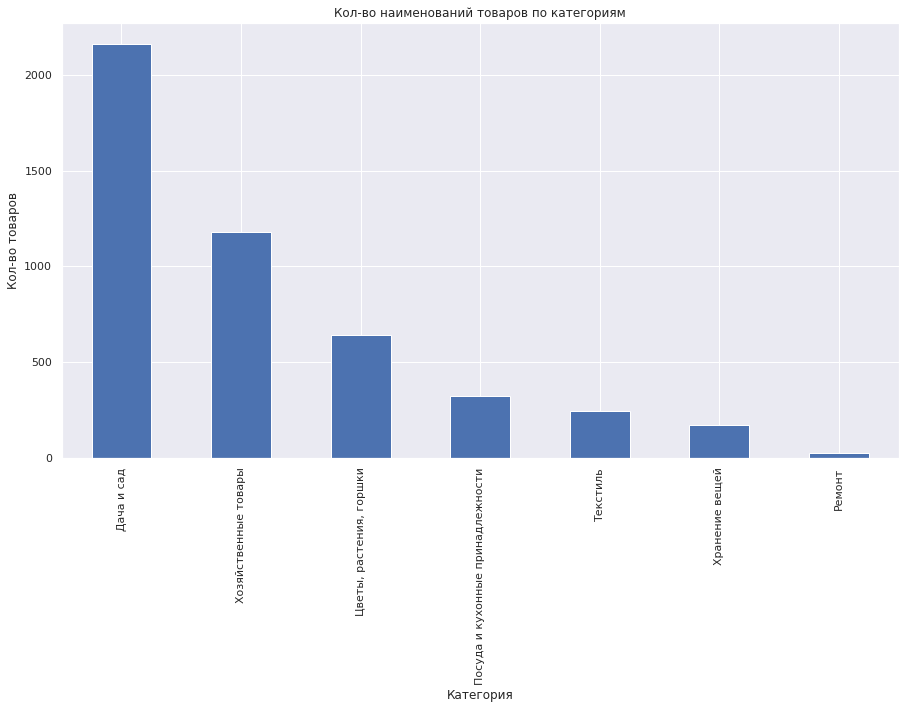

In [34]:
ecom['category'].value_counts().plot(
    kind='bar',
    xlabel='Категория', 
    ylabel='Кол-во товаров', 
    title='Кол-во наименований товаров по категориям'
)
plt.show()

По кол-ву товар в категориях данные распределились неравномерно. Больше всего товаров в категориях Дача и сад и Хозяйственные товары. Посмотрим как это отразилось на продажах.

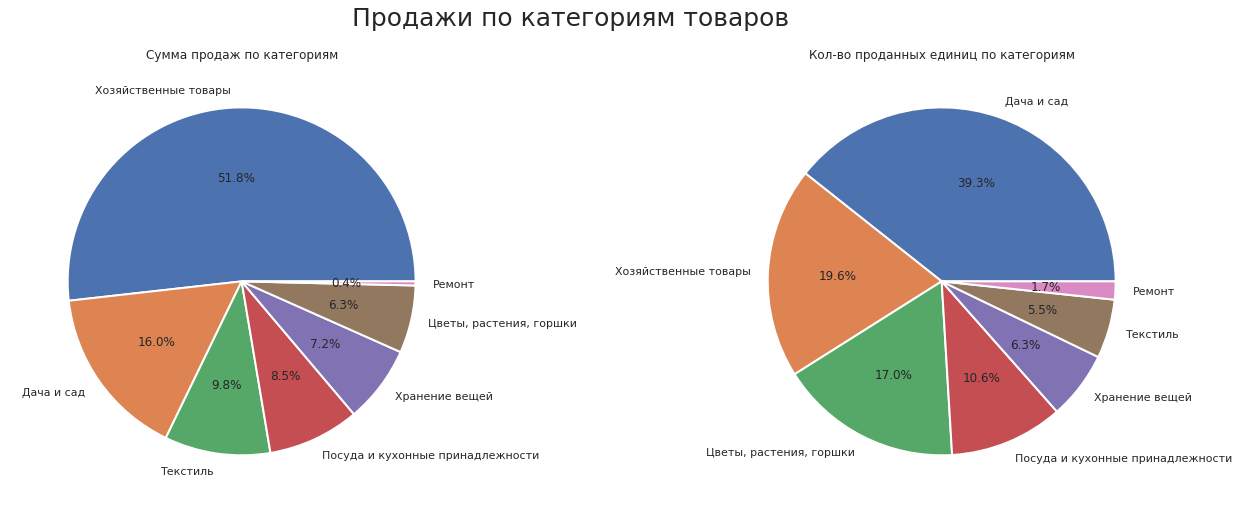

In [35]:
#строим круговые диаграммы по сумме продаж и количеству проданных товаров среди категорий
fig,ax = plt.subplots(1,2, sharex=True, figsize=(23,8))
fig.suptitle('Продажи по категориям товаров',fontsize=25)
ax[0].set_title('Сумма продаж по категориям')
ax[1].set_title('Кол-во проданных единиц по категориям')


ecom.pivot_table(index='category', values = 'total', aggfunc='sum').sort_values(
    by='total', ascending=False).plot(
    ax=ax[0],
    kind='pie', 
    y= 'total',
    subplots=True,
    autopct='%1.1f%%', 
    wedgeprops = {'linewidth': 2, 'edgecolor':'white'}, 
    ylabel = ' ',
    legend=False
)

ecom.pivot_table(index='category', values = 'quantity', aggfunc='sum').sort_values(
    by='quantity', ascending=False).plot(
    ax=ax[1],
    kind='pie', 
    y= 'quantity',
    subplots=True,
    autopct='%1.1f%%', 
    wedgeprops = {'linewidth': 2, 'edgecolor':'white'}, 
    ylabel = ' ',legend=False)


plt.show()

Данные сильно рознятся. По сумме продаж в лидерах Хозяйственные товары - более 51% всех продаж из этой категории, второй в рейтинге является категория Дача и сад и 16%. По проданным единицам в лидерах категория Дача и сад и 39% от проданного количества и Хозяйственные товары на 2м месте. Категория Ремонт самая маленькая и на последнем месте по всем меркам. Но более корректным будет выделить категорию Цветы, растения и горшки, которая по сумме продаж занимает предпоследнее место 6,3%, а по кол-ву замыкает тройку лидеров. Вероятнее всего есть связь со средней ценой товара в различных категориях.

In [36]:
ecom.groupby('category').agg({'price':'median'}).reset_index()

,category,price
0,Дача и сад,120
1,Посуда и кухонные принадлежности,217
2,Ремонт,44
3,Текстиль,749
4,Хозяйственные товары,734
5,Хранение вещей,592
6,"Цветы, растения, горшки",142


Частично медианная стоимость товаров всё-таки повлияла на распределение, но, судя по полученным данным, это не единственная и не основная причина. Так как, например, категория Текстиль имеет максимальную стоимость товаров, но при этом ее нет в тройке ни по одному показателю. Значит, средняя цена товаров - это косвенный показатель.

#### Как распределялись категории в динамике за все время? 

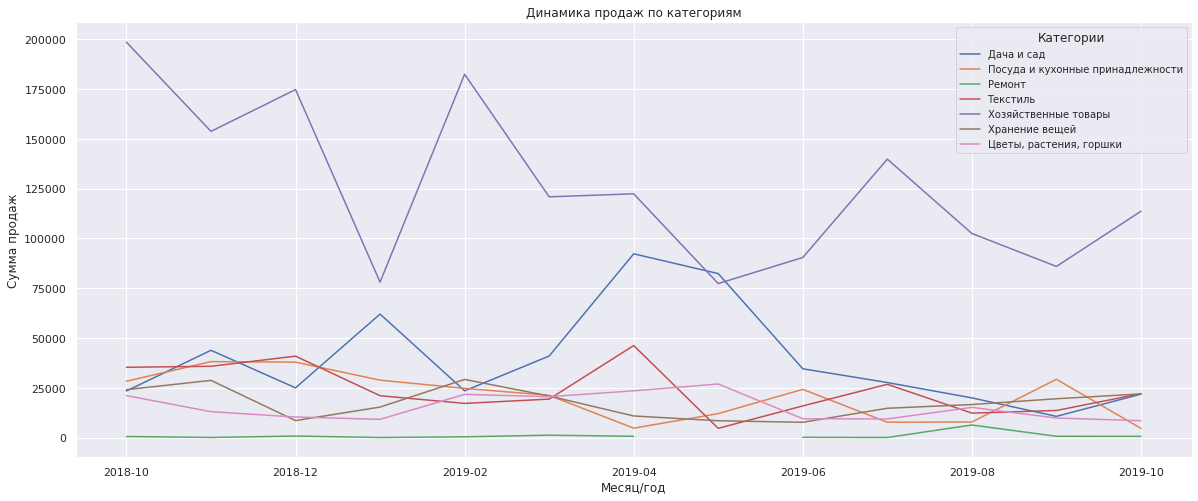

In [37]:
ecom.pivot_table(index='year_month', columns='category',values= 'total', aggfunc='sum').plot(
    figsize=(20, 8),
    xlabel='Месяц/год', 
    ylabel='Сумма продаж', 
    title='Динамика продаж по категориям', 
)
plt.legend(title='Категории', fontsize=10)
plt.show()

Категория Хозяйственные товары лидировала практически на протяжении всего периода. Был небольшой период в мае, когда ненадолго категория Дача и сад взяла верх. Остальные категории стабильны и сумма продаж не превышала 50000 руб за месяц. Стоит отметить, что есть сезонность по категории Дача и сад и в апреле-мае наблюдается серьезный скачок. По категории Ремонт был период, когда продажи отсутствовали. 

#### Как распределяются категории товаров по дням недели? Если ли закономерности в распределении?

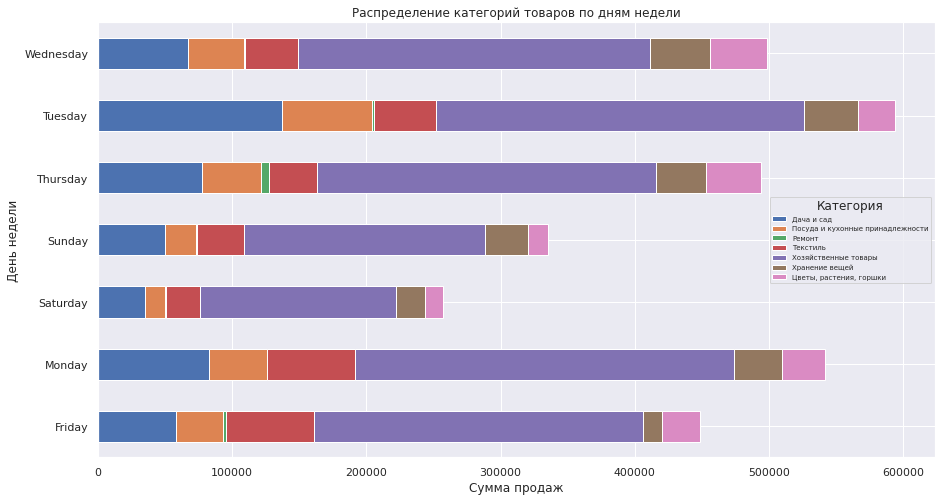

In [38]:
# строим график и сводную по дням недели
ax = ecom.pivot_table(index='weekday', columns='category',values= 'total', aggfunc='sum').plot(
    kind='barh', stacked=True)
ax.set_ylabel('День недели')
ax.set_xlabel('Сумма продаж')
ax.set_title('Распределение категорий товаров по дням недели')

ax.legend(title='Категория', fontsize=7)


plt.show()


Самым прибыльным днем является вторник, почти 600000 р. продаж. Категория Хоз товары стабильно продается на протяжении всей недели и лидирует среди остальных категорий в разрезе дня. Вцелом распределение каждой категории в рамках каждого дня недели одинаковое и доля каждой категории практически не меняется на протяжении всей недели. Общий спад продаж наблюдается ближе к выходным и выходные дни - самые маленькие по продажам.

### Выделение основного и дополнительно ассортимента 

#### АBС анализ по количеству и выручке 

Проведем АБС анализ по количеству проданных товаров и сумме продаж и на основании данного анализа определим какой товар можно определить в основной ассортимент, а какой в дополнительный. Идеальным вариантом было бы сделать параллельно XYZ анализ, но для него нам нужна информация об оборачиваемости товара, которой мы не располагаем. Для проведения АБС анализа сделаем отдельно анализ по сумме продаж и отдельно по количеству единиц. Далее объединим эти таблицы и создадим новый столбец с выделенной категорией. Выделяем группы А, B и C в пропорциях 80%-15%-5% в зависимости от параметра анализа(выручка или кол-во). Анализ решено проводить по периоду 1 год.

In [39]:
# делаем сводную по сумме продаж и сортируем по убыванию
abc = ecom.query('year_month < "2019-10"').pivot_table(index='product', values='total', aggfunc='sum').sort_values(
    by='total', ascending=False).reset_index()

# новый столбец с долей продаж от общей выручки
abc['share_sales'] = abc['total']/abc['total'].sum()

# добавляем столбец с долей продаж с накопительным итогом
abc['share_cum_sales'] = abc['share_sales'].cumsum()

# присваиваем группы согласно условиям
abc['group_sales'] = 'C'
abc['group_sales'][abc['share_cum_sales'] <= 0.8] = 'A'
abc['group_sales'][(abc['share_cum_sales'] <= 0.95) & (abc['group_sales'] != 'A')] = 'B'

abc

,product,total,share_sales,share_cum_sales,group_sales
0,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232,0.02,0.02,A
1,сумка-тележка 2-х колесная gimi argo синяя,44970,0.02,0.03,A
2,сумка-тележка хозяйственная andersen scala shopper plus lini синяя 133-108-90,28045,0.01,0.04,A
3,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",24370,0.01,0.05,A
4,веник сорго с деревянной ручкой с 4-мя швами rozenbal r206204,20010,0.01,0.06,A
...,...,...,...,...,...
2218,морковь детская сладость 2 г 4660010775921,10,0.00,1.00,C
2219,цинния коралловая красавица 02 г 4660010773323,10,0.00,1.00,C
2220,петрушка итальянский гигант 2 г 4660010776553,10,0.00,1.00,C
2221,львиный зев волшебный ковер 005 г 4660010779639,9,0.00,1.00,C


In [40]:
# тоже самое повторяем только по количеству проданных единиц
abc_qua = ecom.query('year_month < "2019-10"').pivot_table(index='product', values='quantity', aggfunc='sum').sort_values(
    by='quantity', ascending=False).reset_index()
abc_qua['share_qua'] = abc_qua['quantity']/abc_qua['quantity'].sum()
abc_qua['share_cum_qua'] = abc_qua['share_qua'].cumsum()
abc_qua['group_qua'] = 'C'
abc_qua['group_qua'][abc_qua['share_cum_qua'] <= 0.8] = 'A'
abc_qua['group_qua'][(abc_qua['share_cum_qua'] <= 0.95) & (abc_qua['group_qua'] != 'A')] = 'B'
abc_qua


,product,quantity,share_qua,share_cum_qua,group_qua
0,щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 55 см 1801096,105,0.01,0.01,A
1,ерш унитазный с деревянной ручкой ваир 1712012,103,0.01,0.02,A
2,цветок искусственный гвоздика пластиковая одиночная в ассортименте 50 см,96,0.01,0.03,A
3,пеларгония розебудная red pandora укорененный черенок,77,0.01,0.04,A
4,однолетнее растение петуния махровая в кассете 4 шт россия,76,0.01,0.05,A
...,...,...,...,...,...
2218,патиссон нло оранжевый раннеспелый d-7 см,1,0.00,1.00,C
2219,патиссон нло белый раннеспелый d-7 см,1,0.00,1.00,C
2220,патиссон зонтик раннеспелый d-7 см,1,0.00,1.00,C
2221,патиссон диск раннеспелый d-7 см,1,0.00,1.00,C


In [41]:
# объединяем таблицы по наименованию
abc = abc.merge(abc_qua, on='product', how='left')

abc


,product,total,share_sales,share_cum_sales,group_sales,quantity,share_qua,share_cum_qua,group_qua
0,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232,0.02,0.02,A,30,0.00,0.18,A
1,сумка-тележка 2-х колесная gimi argo синяя,44970,0.02,0.03,A,42,0.00,0.14,A
2,сумка-тележка хозяйственная andersen scala shopper plus lini синяя 133-108-90,28045,0.01,0.04,A,5,0.00,0.65,A
3,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",24370,0.01,0.05,A,5,0.00,0.66,A
4,веник сорго с деревянной ручкой с 4-мя швами rozenbal r206204,20010,0.01,0.06,A,37,0.00,0.16,A
...,...,...,...,...,...,...,...,...,...
2218,морковь детская сладость 2 г 4660010775921,10,0.00,1.00,C,1,0.00,0.99,C
2219,цинния коралловая красавица 02 г 4660010773323,10,0.00,1.00,C,1,0.00,0.90,B
2220,петрушка итальянский гигант 2 г 4660010776553,10,0.00,1.00,C,1,0.00,1.00,C
2221,львиный зев волшебный ковер 005 г 4660010779639,9,0.00,1.00,C,1,0.00,0.99,C


У нас получилось разделить группы согласно пропорциям 80-15-5 по двум параметрам. Осталомь определить границу деления основного и дополнительного ассортимента. Однозначно, группа A по выручке является самым важным ассортиментом и именно на эти товары являются флагманами нашего магазина и приносят большую часть выручки компании. Группы BB, BC решено определить как дополнительный ассортимент магазина, который приносит 15% выручки. Данный товар пользуется спросом среди покупателей, но приносит меньшую долю выручки магазина. Осталось определить товар из группы СС и CB. Группа СС точно можно рекомендовать для вывода, если этот товар давно на площадке, т.к. он не показывет результатов ни по кол-ву, ни по выручке. Разбираемся с группой СB.

In [42]:

abc.query('group_sales == "C" & group_qua == "B"')['total'].sum()/abc['total'].sum()

0.022427124950932683

Доля выручки данной группы чуть больше 2%, в связи с чем логичнее определить и эту категорию как ассортимент для вывода и требующий дальнейшего анализа.
Теперь на основании данных выводов сделаем разделение на основной, дополнительный и ассортимент для вывода.

In [43]:
def assortment(row):
    sales = row['group_sales']
    qua = row['group_qua']
    
    if sales == 'A':
        return 'основной'
    elif sales == 'C' and qua != 'A':
        return 'вывод из ассортимента'
    else:
        return 'дополнительный'
    
#добавим новый столбец с категорией ао типу этажа по результату функции
abc['assortment'] = abc.apply(assortment, axis=1)
abc

,product,total,share_sales,share_cum_sales,group_sales,quantity,share_qua,share_cum_qua,group_qua,assortment
0,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232,0.02,0.02,A,30,0.00,0.18,A,основной
1,сумка-тележка 2-х колесная gimi argo синяя,44970,0.02,0.03,A,42,0.00,0.14,A,основной
2,сумка-тележка хозяйственная andersen scala shopper plus lini синяя 133-108-90,28045,0.01,0.04,A,5,0.00,0.65,A,основной
3,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",24370,0.01,0.05,A,5,0.00,0.66,A,основной
4,веник сорго с деревянной ручкой с 4-мя швами rozenbal r206204,20010,0.01,0.06,A,37,0.00,0.16,A,основной
...,...,...,...,...,...,...,...,...,...,...
2218,морковь детская сладость 2 г 4660010775921,10,0.00,1.00,C,1,0.00,0.99,C,вывод из ассортимента
2219,цинния коралловая красавица 02 г 4660010773323,10,0.00,1.00,C,1,0.00,0.90,B,вывод из ассортимента
2220,петрушка итальянский гигант 2 г 4660010776553,10,0.00,1.00,C,1,0.00,1.00,C,вывод из ассортимента
2221,львиный зев волшебный ковер 005 г 4660010779639,9,0.00,1.00,C,1,0.00,0.99,C,вывод из ассортимента


In [44]:
abc['assortment'].value_counts()

дополнительный           852
вывод из ассортимента    745
основной                 626
Name: assortment, dtype: int64

Итого у нас получилось такое распределение. Больше всего товаров входит в дополнительный ассортимент (852 товара), меньше всего в основной - 626 товаров. Достаточно большая доля группы для вывода из ассортимента. Здесь стоит отметить, что это результаты продаж, которые требуют более детального анализа для выявления причин низких продаж у этой группы товаров.

### Анализ товаров 

#### Какие топ 10 самых популярных товаров за весь период (по количеству и выручке) за все время? Всегда ли                          эти   товары были в лидерах? 

In [45]:
# делаем сводную по общей выручке по каждому товару и смотрим топ 10
sales = ecom.pivot_table(index='product', values=['quantity','total'],aggfunc='sum').sort_values(
    by='total',ascending=False).reset_index().head(10)
sales

,product,quantity,total
0,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,30,53232
1,сумка-тележка 2-х колесная gimi argo синяя,47,50405
2,сумка-тележка хозяйственная andersen scala shopper plus lini синяя 133-108-90,5,28045
3,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",5,24370
4,веник сорго с деревянной ручкой с 4-мя швами rozenbal r206204,37,20010
5,сумка-тележка 3-х колесная gimi tris floral синяя,7,18893
6,сумка-тележка хозяйственная andersen treppensteiger scala shopper hera черная 119-004-80,3,18560
7,сумка-тележка хозяйственная andersen scala shopper lini синяя 112-108-90,4,18296
8,сумка-тележка 2-х колесная складная gimi flexi зеленая,11,18139
9,гладильная доска ника blues 124х46 см 5757,7,17786


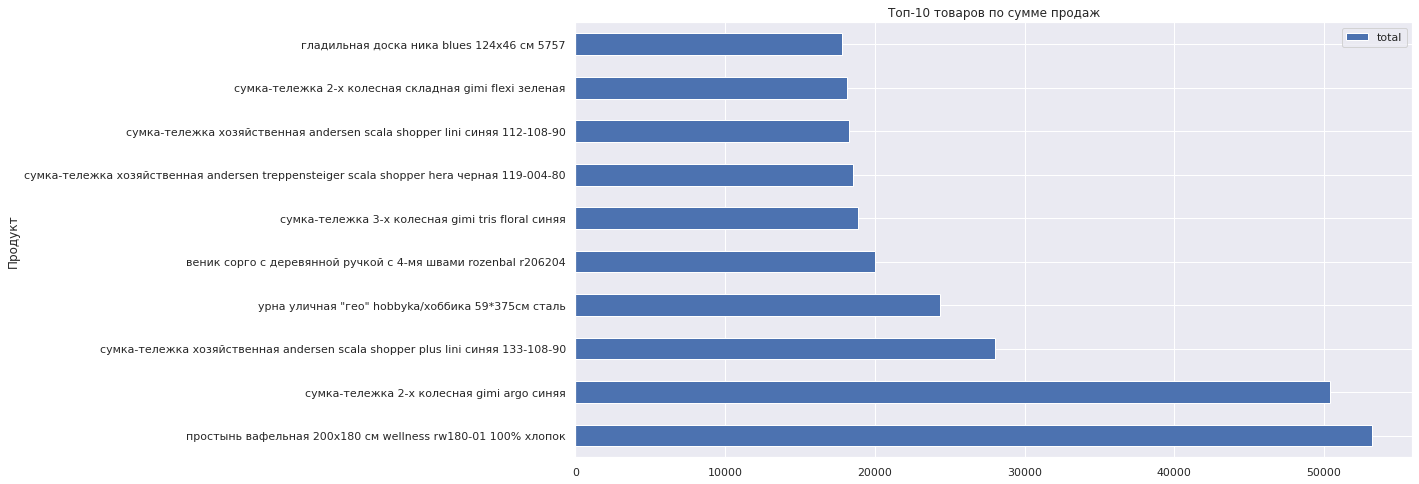

In [46]:
# строим график
ecom.pivot_table(index='product', values='total',aggfunc='sum').sort_values(
    by='total',ascending=False).head(10).plot(
    kind='barh',
    title ='Топ-10 товаров по сумме продаж',
    xlabel='Продукт',
    ylabel='Сумма продаж'
)
plt.show()

Среди топ-10 товаров 6 занимают различные модели сумок-тележек, но топ-1 товар по продажам является простынь, 53232 руб и 30 проданных штук. Стоит отметить, что очень рознится кол-во проданных товаров среди топ-10, некоторые товары действительно нравятся покупателям и товары покупают регулярно, а есть и те, которые продаются 1 раз в несколько месяцев и имеют высокую цену, в связи с чем и попали в топ-10. Один из таких примеров - сумка-тележка хозяйственная andersen, которая продана всего 3 раза за год, но товар по высокой цене. Но не исключен также вариант оптовых заказов. Проверим эту теорию.

In [47]:
# сохраняем товары из топ-10 в отдельную переменную
top_10 = sales['product']


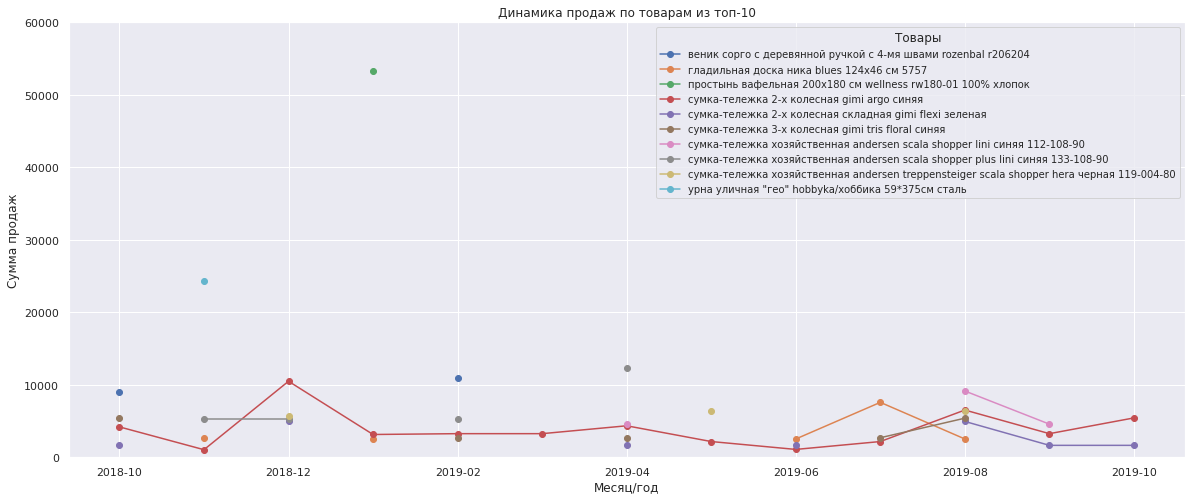

In [48]:
# строим график динамики продаж по топ-10
ecom.query('product in @top_10').pivot_table(index='year_month', columns='product',values= 'total', aggfunc='sum').plot(
    figsize=(20, 8),
    xlabel='Месяц/год', 
    ylabel='Сумма продаж', 
    title='Динамика продаж по товарам из топ-10',
    style='o-', 
)
plt.ylim(0, 60000)
plt.legend(title='Товары', fontsize=10)
plt.show()

В динамике стабильные продажи на протяжении всего года имеет только топ-2 - сумка-тележка 2-х колесная gimi argo синяя, пик продаж был в декабре 2018. Остальные товары - нестабильны, скорее всего это разовые оптовые заказы. Теперь посмотрим рейтинг по кол-ву проданных единиц.

In [49]:
# делаем сводную по кол-ву проданных товаров
ecom.pivot_table(index='product', values=['quantity','total'],aggfunc='sum').sort_values(
    by='quantity',ascending=False).reset_index().head(10)


,product,quantity,total
0,щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 55 см 1801096,105,6810
1,ерш унитазный с деревянной ручкой ваир 1712012,103,5633
2,цветок искусственный гвоздика пластиковая одиночная в ассортименте 50 см,96,2007
3,пеларгония розебудная red pandora укорененный черенок,79,10655
4,однолетнее растение петуния махровая в кассете 4 шт россия,76,6248
5,муляж красное яблоко мини полиуретан d-6 см,63,1279
6,пеларгония зональная диам. 12 см красная махровая,63,10514
7,пеларгония зональная диам. 12 см сиреневый полумахровый,63,10780
8,тарелка суповая luminarc океан эклипс 205 см l5079,60,4680
9,пеларгония розебудная prins nikolai укорененный черенок,60,8090


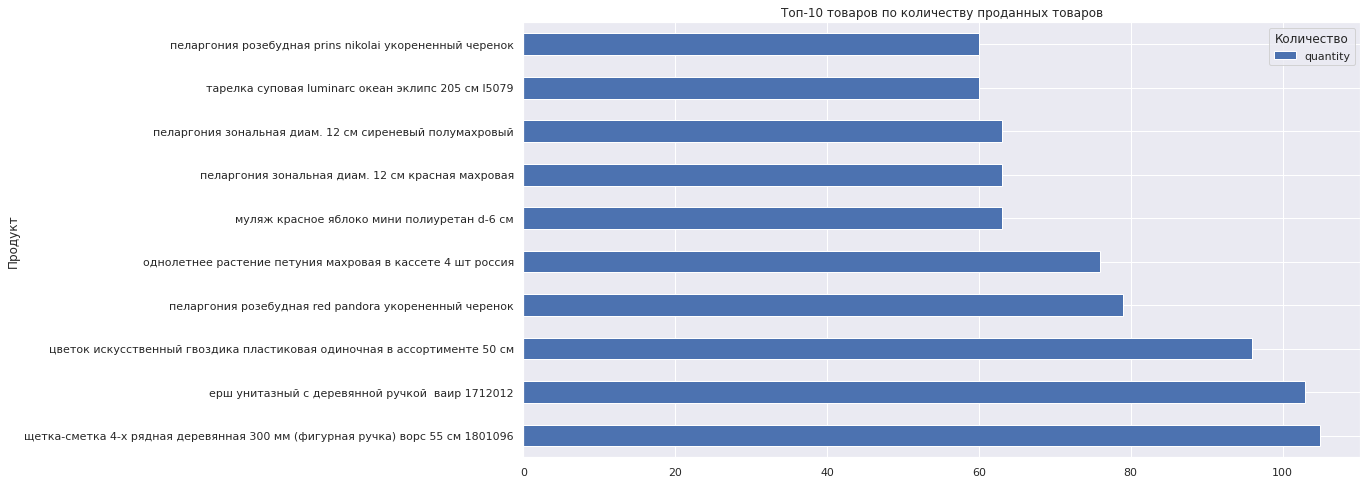

In [50]:
# строим график топ-10 по кол-ву товаров
ecom.pivot_table(index='product', values='quantity',aggfunc='sum').sort_values(
    by='quantity',ascending=False).head(10).plot(
    kind='barh',
    title ='Топ-10 товаров по количеству проданных товаров',
    xlabel='Продукт',
    ylabel='Количество товаров'
)
plt.legend(title='Количество')
plt.show()

По количеству проданных товаров топ-10 сильно отличается и нет ни одного совпадения с предыдущим рейтингом. Первое место среди самых частопокупаемых товаров является щетка-сметка 4-х рядная деревянная, которых было продано 105 ед. Чуть ниже расположился ерш унитазный с деревянной ручкой и 103 продажи за весь период.

#### Какие антилидеры среди всех товаров за весь период (по количеству и выручке) за все время? 

In [51]:
# построим сводную по антилидерам в разрезе кол-ва продаж и суммы
ecom.pivot_table(index='product', values=['quantity','total'],aggfunc='sum').sort_values(
    by='total').reset_index().head(10)

,product,quantity,total
0,львиный зев волшебный ковер 005 г 4660010779639,1,9
1,горох амброзия 100 г 4660010772616,1,9
2,петрушка итальянский гигант 2 г 4660010776553,1,10
3,незабудка смесь 01 г 4650091480340,1,10
4,цинния оранжевый король 05 г 4660010770520,1,10
5,цинния коралловая красавица 02 г 4660010773323,1,10
6,морковь детская сладость 2 г 4660010775921,1,10
7,огурец засолочный 03 г 4660010776102,1,10
8,лаватера монт блан 03 г 4660010778588,1,11
9,тимьян овощной медок 01 г 4660010776423,1,11


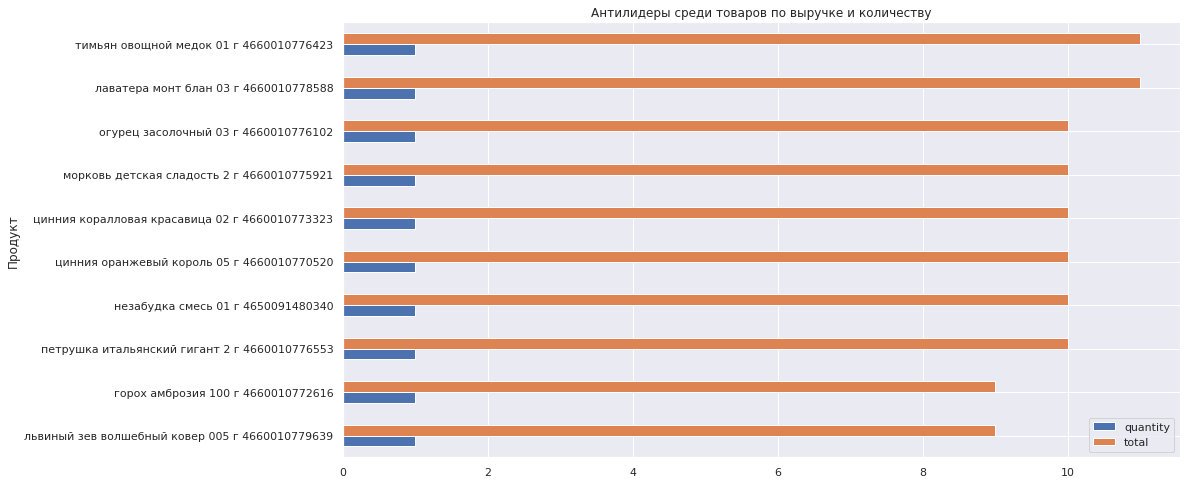

In [52]:
ecom.pivot_table(index='product', values=['quantity','total'],aggfunc='sum').sort_values(
    by='total').head(10).plot(
    kind='barh',
    title ='Антилидеры среди товаров по выручке и количеству',
    xlabel='Продукт',
    ylabel=' '
)

plt.show()

Все товары антилидеры - семена с очень низкой средней ценой 10 руб, при этом все эти товары были проданы только по 1 разу за весь период. Здесь есть вопрос о целесообразности данных товаров в товарном ассортименте магазина, т.к оборачиваемость этих товаров улетает в космос.

### Анализ заказов 

#### Как меняется кол-во заказов в разрезе месяца/дня недели/часа? 

In [53]:
ecom.pivot_table(index='year_month', values='order_id',aggfunc='count').sort_values(
    by='year_month').reset_index()

,year_month,order_id
0,2018-10,471
1,2018-11,427
2,2018-12,299
3,2019-01,181
4,2019-02,357
5,2019-03,405
6,2019-04,671
7,2019-05,683
8,2019-06,322
9,2019-07,311


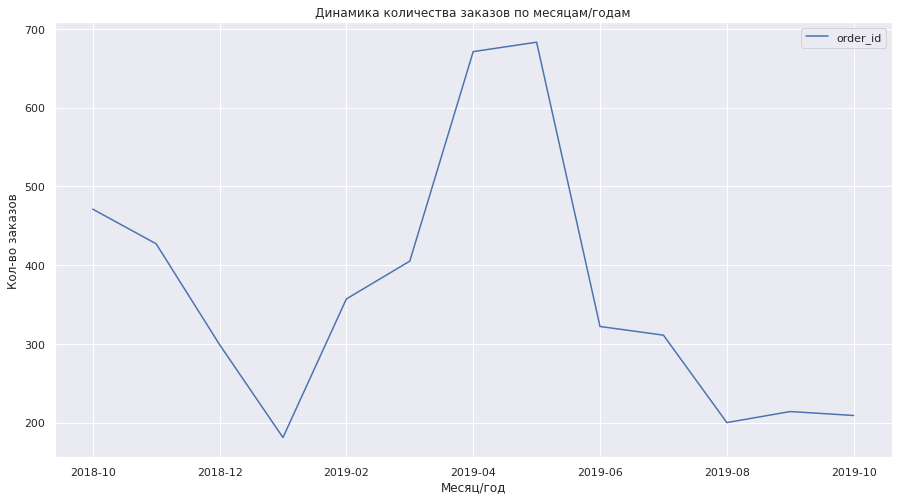

In [54]:
ecom.pivot_table(index='year_month', values='order_id',aggfunc='count').sort_values(
    by='year_month').plot(
    grid=True, 
    xlabel='Месяц/год', 
    ylabel='Кол-во заказов', 
    title='Динамика количества заказов по месяцам/годам'
)
plt.show()

Самыми активными месяцами были апрель и май, а самым провальным - январь. Актиность, вероятнее всего, связана с началом садового сезона, но уже в июне и дальше - сильный спад с 600 до 200 заказов в месяц.

In [55]:
# сводная по количеству заказов по дням недели
ecom.pivot_table(index='weekday', values='order_id',aggfunc='count').sort_values(
    by='weekday').reset_index()

,weekday,order_id
0,Friday,595
1,Monday,885
2,Saturday,498
3,Sunday,516
4,Thursday,752
5,Tuesday,765
6,Wednesday,739


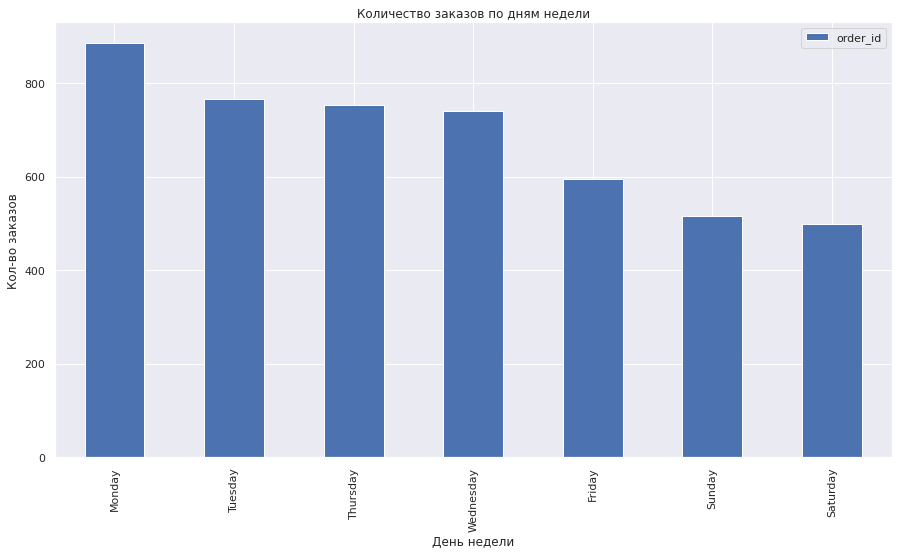

In [56]:
ecom.pivot_table(index='weekday', values='order_id',aggfunc='count').sort_values(by='order_id', ascending=False).plot(
    kind = 'bar',
    xlabel='День недели', 
    ylabel='Кол-во заказов', 
    title='Количество заказов по дням недели'
)
plt.show()

В будние дни заказов заметно выше - не менее 600, а в выходные - в пределах 500-520 заказов, спад начинается с пятницы. Самым активным днем недели является понедельник - заказов более 850. Стоит учесть эту информацию для составления расписания сотрудников, обрабатывающих заказы.

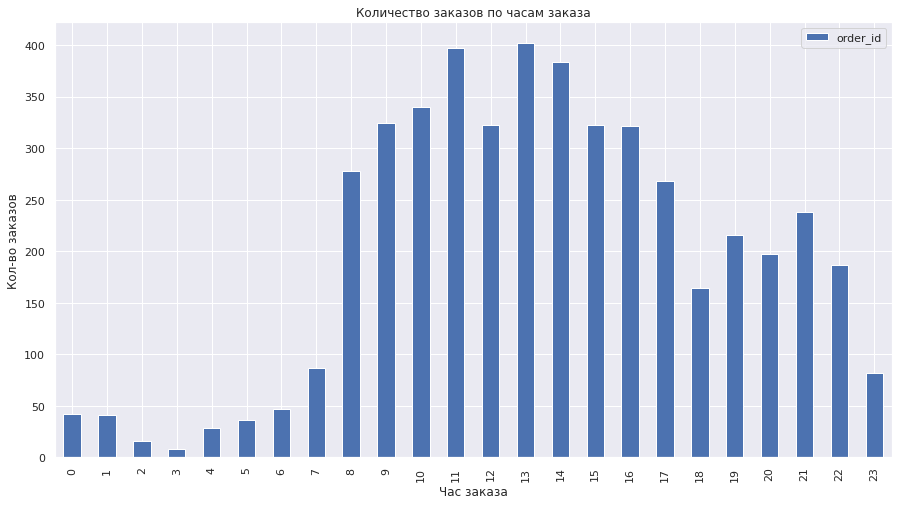

In [57]:
# строим график по заказам в резрезе часов
ecom.pivot_table(index='hour', values='order_id',aggfunc='count').plot(
    kind='bar',
    title='Количество заказов по часам заказа',
    xlabel='Час заказа', 
    ylabel='Кол-во заказов', 
)
plt.show()

Пиковые часы - дневные с 8 до 17 часов, около 400 заказов в 11 и 13 часов - это самые активные часы, с 23 до 7 утра, что ожидаемо, самые неактивные на заказы.

### Вывод

По результатам исследования на данном этапе можно сделать следующие выводы:    
- всего в магазине 2313 наименований товаров и 2736 заказов клиентов и данные с октября 2018 по октябрь 2019 включительно; 
- по кол-ву товар в категориях больше всего товаров в категориях Дача и сад и Хозяйственные  товары;
- по сумме продаж в лидерах Хозяйственные товары - более 51% всех продаж из этой категории, второй в рейтинге является категория   Дача и сад и 16%; по проданным единицам в лидерах категория Дача и сад и 39% от проданного количества и Хозяйственные товары     на 2м месте;
- категория Хозяйственные товары лидировала практически на протяжении всего периода; остальные категории стабильны и сумма         продаж не превышала 50000 руб за месяц; есть сезонность по категории Дача и сад и в апреле-мае наблюдается серьезный скачок;
- самым прибыльным днем является вторник, почти 600000 р. продаж; категория Хоз товары стабильно продается на протяжении всей     недели и лидирует среди остальных категорий в разрезе дня; распределение каждой категории в рамках каждого дня недели           одинаковое и доля каждой категории практически не меняется на протяжении всей недели;
- по результатам АВС анализа было осуществлено разделение товаров на группы: основно, дополнительный и вывод из ассортимента       (группа, которая нуждается в дальнейшем анализе)
- среди топ-10 товаров 6 занимают различные модели сумок-тележек, но топ-1 товар по продажам является простынь, 53232 руб и       30 проданных штук, при этом только 1 товар - сумка-тележка 2-х колесная gimi argo синяя имеет стабильные продажи на             протяжении всего периода, а остальные - разовые покупки;     
- по количеству проданных единиц результаты совсем другие, среди самых частопокупаемых товаров является щетка-сметка 4-х           рядная деревянная, которых было продано 105 ед;   
- товары-антилидеры - семена с очень низкой средней ценой 10 руб, при этом все эти товары были проданы только по 1 разу за         весь период, есть вопрос о выводе их из ассортимента;   
- самыми активными месяцами по кол-ву заказов были апрель и май, а самым провальным - январь, больше всего заказов по             понедельникам и вцелом по будням (более 600) и ближе к выходным наблюдается спад заказов (500-520);   
- пиковые часы для заказов с 8 до 17 часов, из них в 11 и 13 - больше всего заказов (около 400), в ночные часы с 23 до 7 -         заказы минимальны

## Проверка гипотез 

### Проверить гипотезу: Количество уникальных наименований товаров из категории Хозяйственные товары  и    Дача и сад  равны 

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Количество уникальных наименований товаров из категории Хозяйственные товары и Дача и сад равны;  
Альтернативная гипотеза H₁: Количество уникальных наименований товаров из категории Хозяйственные товары и Дача и сад различаются

Так как наши выборки распределены неравномерно, применим критерий Манна-Уитни

In [58]:
# подготовим данные для проверки
hoz = ecom.query('category == "Хозяйственные товары"')
category_1 = hoz['product'].nunique()

dacha = ecom.query('category == "Дача и сад"')
category_2 = dacha['product'].nunique()

In [59]:
#проверим статистическое различие групп
alpha = .05 # уровень статистической значимости
results = stats.mannwhitneyu(category_1, category_2)[1]

print('p-value:', "{0:.2f}".format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу')
    print('Количество уникальных наименований товаров из категории Хозяйственные товары и Дача и сад равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    print('Количество уникальных наименований товаров из категории Хозяйственные товары и Дача и сад различаются')

p-value: 1.00
Не получилось отвергнуть нулевую гипотезу
Количество уникальных наименований товаров из категории Хозяйственные товары и Дача и сад различаются


In [60]:
print('Количество уникальных наименований по категории Хоз товары:', category_1)
print('Количество уникальных наименований по категории Дача и сад:', category_2)

Количество уникальных наименований по категории Хоз товары: 588
Количество уникальных наименований по категории Дача и сад: 737


Согласно полученным значениям и результату стат теста количество уникальных наименований товаров из категории Хозяйственные товары и Дача и сад различаются, это подтверждает и полученный результат в количественном выражении.

### Проверить гипотезу: Выручка в категории Дача и сад в летние месяцы равна выручке категории Хоз товары в зимние месяцы

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Выручка в категории Дача и сад в летние месяцы равна выручке категории Хоз товары в зимние месяцы
  
Альтернативная гипотеза H₁: Выручка в категории Дача и сад в летние месяцы и выручка по категории Хоз товары в зимние месяцы различаются

По этой же причине, что и в гипотезе выше, применим критерий Манна-Уитни

In [61]:
#подготовим данные
sales_hoz = hoz.query('"2018-11" < year_month < "2019-03"')['total'].sum()
sales_dacha = dacha.query('"2019-05" < year_month < "2019-09"')['total'].sum()

In [62]:
#проверим статистическое различие групп
alpha = .05 # уровень статистической значимости
results = stats.mannwhitneyu(sales_hoz, sales_dacha)[1]

print('p-value:', "{0:.2f}".format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу')
    print('Выручка в категории Дача и сад в летние месяцы равна выручке категории Хоз товары в зимние месяцы')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    print('Выручка в категории Дача и сад в летние месяцы и выручка по категории Хоз товары в зимние месяцы различаются')

p-value: 1.00
Не получилось отвергнуть нулевую гипотезу
Выручка в категории Дача и сад в летние месяцы и выручка по категории Хоз товары в зимние месяцы различаются


In [63]:
print('Выручка по категории Хоз товары в зимние месяцы:', sales_hoz)
print('Выручка в категории Дача и сад в летние месяцы:', sales_dacha)


Выручка по категории Хоз товары в зимние месяцы: 435319
Выручка в категории Дача и сад в летние месяцы: 82247


По результатам стат теста наблюдается различие между выручкой в категории Дача и сад в летние месяцы и выручкой по категории Хоз товары в зимние месяцы.
P-value = 1.00, что  больше 0.05, а это значит,  причин отвергать нулевую гипотезу и считать, что  выручка в категории Дача и сад в летние месяцы и выручка по категории Хоз товары в зимние месяцы равны, нет. Выручка по категории Хоз товары в зимние месяцы(435319) значительно выше выручки в категории Дача и сад в летние месяцы(82247)


### Рекомендации для отдела закупок

Для отдела закупок можно сформулировать несколько рекомендаций:
- стоит сфокусировать внимание на категорию основного ассортимента, т.к. именно эта категория приносит 80% выручки магазина и необходимо обеспечить количество товара, покрывающее спрос покупателей на этот товар.  К сожалению, мы не располагаем данными об старте запуска этих товаров, всегда ли данный товар был в наличии и получает ли компания прибыль с этих товаров, но можно сделать вывод на основании проведенного исследования о том, что товар востребован и если товар реньабелен, то можно включать данные товары в различные рекламные каналы и рассылки и в таком случае, необходимо будет дополнительное количество товаров для закупки
- по результатам анализа было выявлено 745 товаров, которые имеют очень низкие показатели по выручке и кол-ву проданных единиц. Данные товары требуют более детального разбора для выявления причин просадки, возможно, товары только поступили в продажу или были в маленьком остатке, имеют низкий рейтинг, высокую цену и многие др причины. На текущий момент есть факт плачевных результатов по данным товарам и есть вопрос о целесообразности их нахождения в ассортименте и дальнейшей закупки.

## Вывод

По результатам исследования на данном этапе можно сделать следующие выводы:    
- всего в магазине 2313 наименований товаров и 2736 заказов клиентов и данные с октября 2018 по октябрь 2019 включительно; 
- по сумме продаж в лидерах Хозяйственные товары - более 51% всех продаж из этой категории, второй в рейтинге является категория   Дача и сад и 16%; по проданным единицам в лидерах категория Дача и сад и 39% от проданного количества и Хозяйственные товары     на 2м месте;
- категория Хозяйственные товары лидировала практически на протяжении всего периода; остальные категории стабильны и сумма         продаж не превышала 50000 руб за месяц; есть сезонность по категории Дача и сад и в апреле-мае наблюдается серьезный скачок;
- самым прибыльным днем является вторник, почти 600000 р. продаж; категория Хоз товары стабильно продается на протяжении всей     недели и лидирует среди остальных категорий в разрезе дня; распределение каждой категории в рамках каждого дня недели           одинаковое и доля каждой категории практически не меняется на протяжении всей недели;
- по результатам АВС анализа было осуществлено разделение товаров на группы: основной, дополнительный и вывод из ассортимента       (группа, которая нуждается в дальнейшем анализе)
- среди топ-10 товаров 6 занимают различные модели сумок-тележек, но топ-1 товар по продажам является простынь, 53232 руб и       30 проданных штук, при этом только 1 товар - сумка-тележка 2-х колесная gimi argo синяя имеет стабильные продажи на             протяжении всего периода, а остальные - разовые покупки;     
- по количеству проданных единиц результаты совсем другие, среди самых частопокупаемых товаров является щетка-сметка 4-х           рядная деревянная, которых было продано 105 ед;   
- товары-антилидеры - семена с очень низкой средней ценой 10 руб, при этом все эти товары были проданы только по 1 разу за         весь период, есть вопрос о выводе их из ассортимента;   
- самыми активными месяцами по кол-ву заказов были апрель и май, а самым провальным - январь, больше всего заказов по             понедельникам и вцелом по будням (более 600) и ближе к выходным наблюдается спад заказов (500-520);   
- пиковые часы для заказов с 8 до 17 часов, из них в 11 и 13 - больше всего заказов (около 400), в ночные часы с 23 до 7 -         заказы минимальны
- по результатам стат теста наблюдается различие между количеством уникальных наименований товаров из категории Хозяйственные     товары и Дача и сад, а также наблюдается различие между выручкой в категории Дача и сад в летние месяцы и выручкой по           категории Хоз товары в зимние месяцы.